# Advertising Sales Channel Prediction

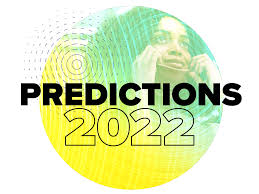

### Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

### Importing important Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset with Pandas:

In [3]:
# Reading the csv file from dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


There are 5 columns which contains both features and one target variable. Here "sales" is the target variable which contains continuous data so it is a regression type problem. Here the dataset contains the data of advertising dollars spent on TV, radio and newspaper and the label contains the sales of a single product in a given market. So in order to improve the sales, we are advertising on the mentioned features.

Also the column Unnamed is taken on the basis of index purpose, so it has no relation with our target variable. On this basis I am going to remove this column.



In [4]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
# Checking the dimension of the dataset
df.shape

(200, 4)

In [7]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# Checking the types of the dataset
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

### Checking null values in the Dataset:

In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

### checking the null values Using heatmap:

<AxesSubplot:>

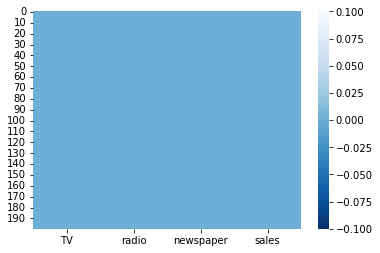

In [10]:
sns.heatmap(df.isnull(), cmap='Blues_r')

### There is Nan values in this dataset

In [11]:
# Checking the uniqueness of target variable
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [12]:
# List of values in the target variable
df["sales"].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

In [13]:
# Checking whether the dataset contains any space
df.loc[df['sales']==" "]

,TV,radio,newspaper,sales


### Description of Dataset

In [14]:
# Statistical summary of dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

In the above description,

The mean value of TV is 147 which means this platform has good sales. But we can't conclude on this basis. We can also notice the counts of all the columns are 200 which means no null values. In summarizing the data we can observe that the dataset seems to be having more outliers as well as skewness in the data.

### Exploration of Data & Visualization:

In [15]:
# Checking number of unique values in all the columns and plotting pie-chart
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

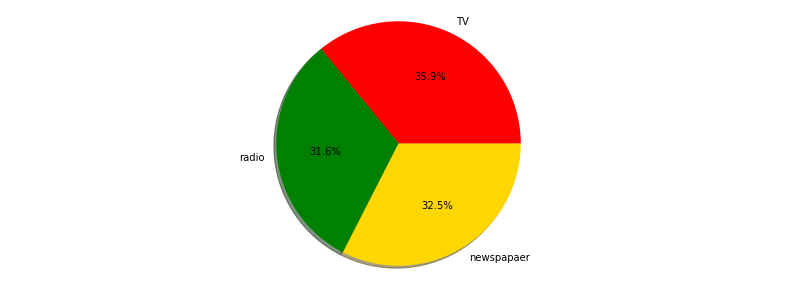

In [17]:
labels = 'TV','radio','newspapaer'
sizes = [190,167,172]
colors = ['red','green','gold']


#plot
plt.figure(figsize=(14,5))
plt.pie(sizes,labels=labels,colors = colors,
        autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()

### Univariate Analysis

<AxesSubplot:xlabel='TV', ylabel='Density'>

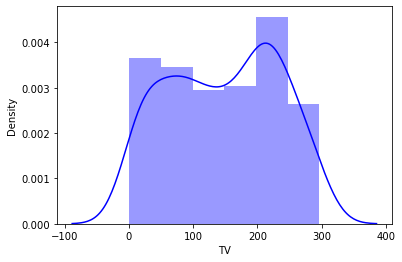

In [19]:
# Checking how the data is distributed in the column TV
sns.distplot(df["TV"], color='blue')

<AxesSubplot:xlabel='radio', ylabel='Density'>

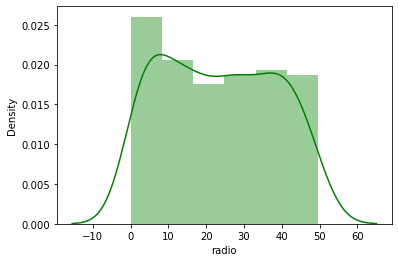

In [22]:
# Checking how the data is distributed in the column radio
sns.distplot(df["radio"], color ='green')

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

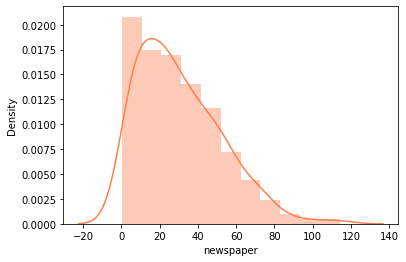

In [23]:
# Checking how the data is distributed in the column newspaper
sns.distplot(df["newspaper"], color='coral')

<AxesSubplot:xlabel='sales', ylabel='Density'>

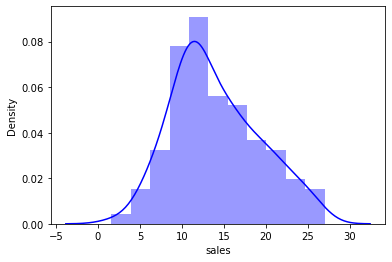

In [24]:
# Checking how the data is distributed in the target variable sales
sns.distplot(df["sales"],  color ='blue')

From the above plotting analysis we can say that the data in the columns are almost normally distributed and some columns contains skewness. So we will treat this skewness in the later part.

### Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between TV and radio'}, xlabel='TV', ylabel='radio'>

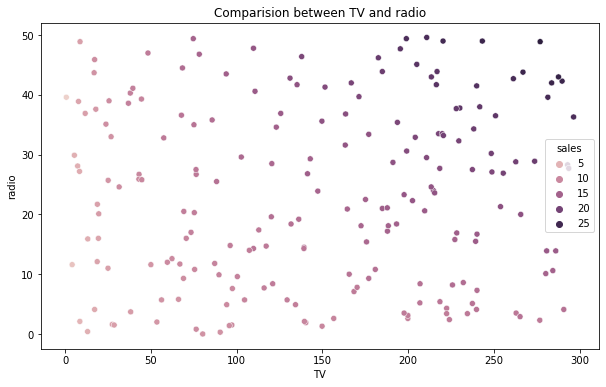

In [25]:
# Checking the relation between TV and radio on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and radio')
sns.scatterplot(df['TV'],df['radio'],hue=df["sales"])

Here we can see the data is scattered so there is no linear relationship while comparing TV and radio. As we can see from the plot, if we spend 5 to 15 dollars(say) then we dont get any sales from both TV and radio .But if we spend more money than this then we can see the increment in the sales.

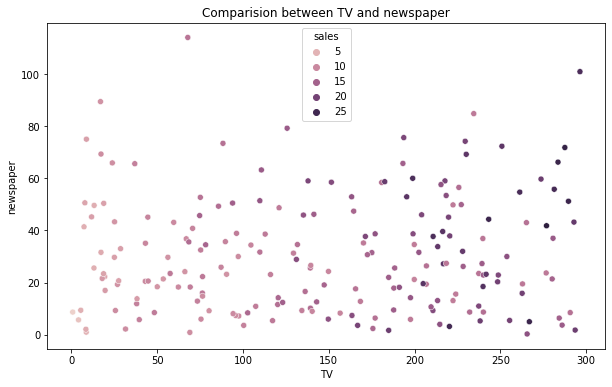

In [26]:
# Checking the relation between TV and newspaper on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"]);

Data is scattered so there is no linear relationship while comparing TV and radio. As we can see from the plot, if we spend 5 to 15 dollars(say) then we dont get any sales from both TV and radio .But if we spend more money than this then we can see the increment in the sales.

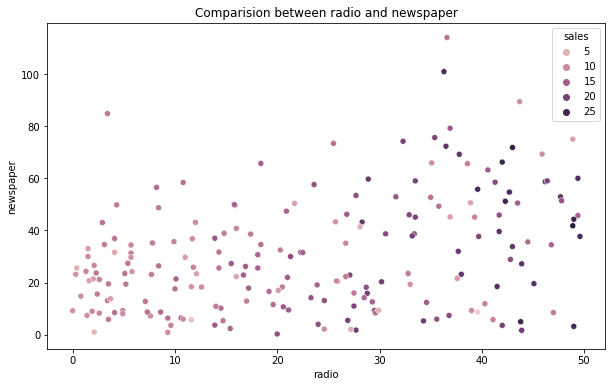

In [27]:
# Checking the relation between radio and newspaper on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between radio and newspaper')
sns.scatterplot(df['radio'],df['newspaper'],hue=df["sales"]);

There is no linear relationship between these features. Also we can witness some outliers present here.

From the above plots we can notice, if we invest more money then we get more sales in all the platforms.

Now let's see the relationship between the features and label.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

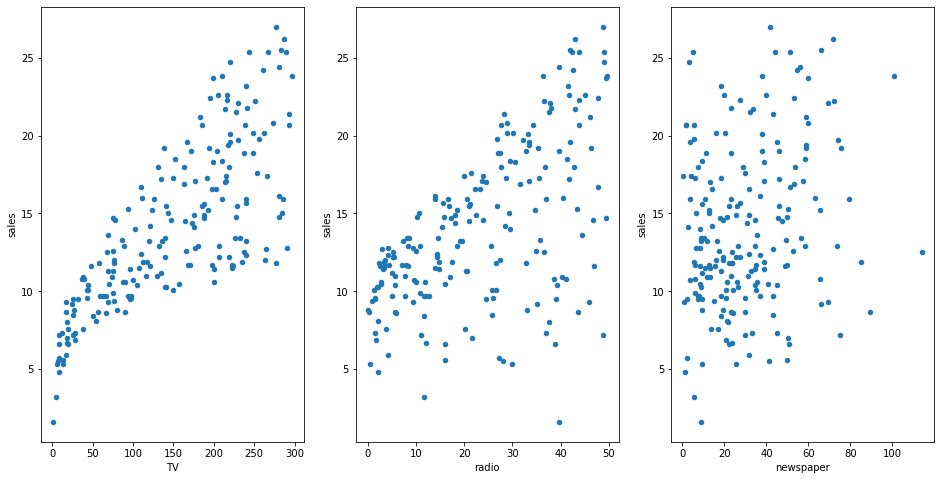

In [28]:
# Visualizing the relationship between the features and the label 
fig, axs = plt.subplots(1,3)

df.plot(x = "TV", y = "sales", kind = "scatter", ax=axs[0], figsize = (16,8))
df.plot(x = "radio", y = "sales", kind = "scatter", ax=axs[1])
df.plot(x = "newspaper", y = "sales", kind = "scatter", ax=axs[2])

A linear relationship between the features TV, Radio with the sales.

Increasing our investment in advertising the product on TV leads to improvemnt in our sales and getting upto 80% profit too. Which means there is a positive linear relationship.

This means if we invest in advertising the product on radio then also we can get a profit in our sales but not more as TV. And we can say we are getting 45%(say) profit. But there is no loss in advertising on radio.

Newspaper vs sales In case of newspaper there is no relationship with sales which means advertising the product on newspaper will not improve our sales also we get more loss by investing money on newspaper. So we can say may be newspaper is not the best platform to invest the money. But we cannot conclude on this basis, will move further and analyze it.

# Multivariate Analysis

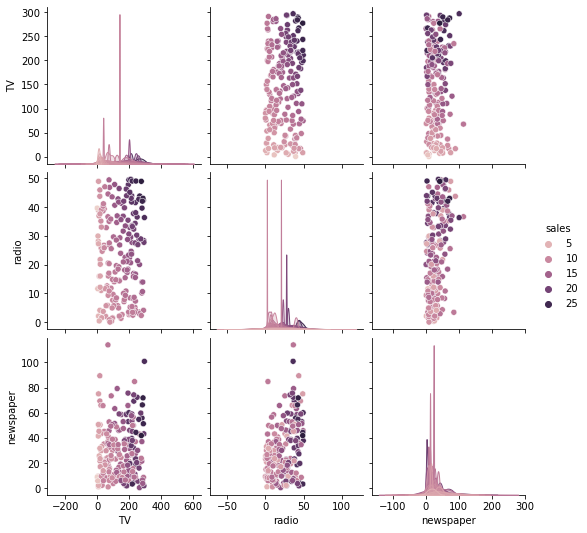

In [29]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="sales")

From this pairplot we can observe that the correlation exists between two variables and on the diagonal we can see distribution plotting. As we can see the features TV and radio are highly correlated.

<AxesSubplot:xlabel='TV', ylabel='Count'>

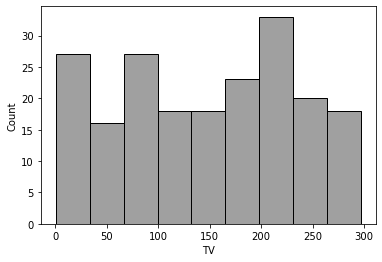

In [31]:
sns.histplot(df['TV'], color='grey')

<AxesSubplot:xlabel='radio', ylabel='Count'>

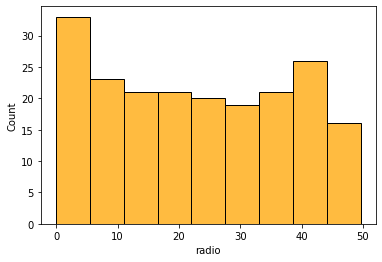

In [32]:
sns.histplot(df["radio"], color='orange')

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

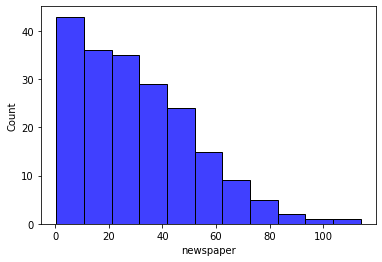

In [33]:
sns.histplot(df["newspaper"], color ='blue')

### Correlation Analysis

In [34]:
cor = df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


correlation between the denpendent and independent variables. We can visualize this by plotting heat map

### Heatmap

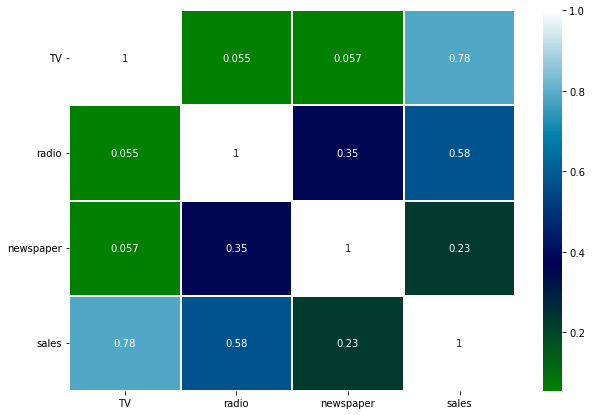

In [39]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),linewidths=.1,cmap="ocean",annot = True)
plt.yticks(rotation=0);

The heat map contains only positive correlation.

In [40]:
cor['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

### correlation between label and features using bar plot

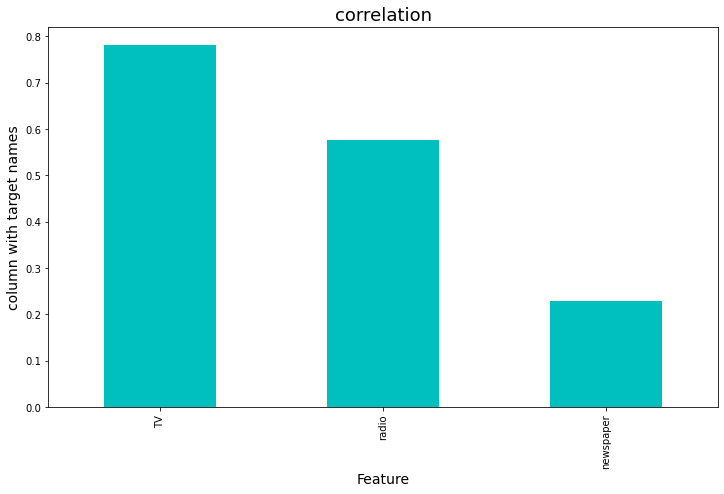

In [41]:
plt.figure(figsize=(12,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### Identifying the outliers

<AxesSubplot:>

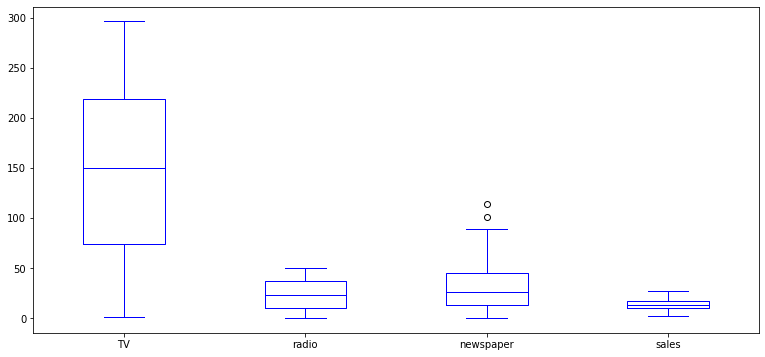

In [43]:
df.plot(kind="box", figsize = (13,6), color="b")

### Removing outliers

### Zscore method

In [44]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [45]:
variables = df[["newspaper"]]

In [46]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(variables))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [47]:
df.shape

(200, 4)

In [48]:
new_df.shape


(198, 4)

In [49]:
# Let's check the the data loss
data_loss = (200-198)/200*100
data_loss

1.0

Only 1% data loss is acceptable as the acceptable range is upto 10%

### Checking for skewness

In [50]:
# Checking the skewness
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Skewness threshold is taken as +/- 0.65.

Only newspaper has skewness.

### Removing Skewness using power transform method

In [51]:
feature = ["newspaper"]

In [52]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [53]:
new_df[feature] = scaler.fit_transform(new_df[feature].values)
new_df[feature]

,newspaper
0,1.604196
1,0.831044
2,1.607052
3,1.283768
4,1.280622
...,...
195,-0.687435
196,-1.146090
197,-1.314437
198,1.517395


In [54]:
# Now let's check the skewness after applying yeo-johnson method.
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

### normal distribution plots 

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

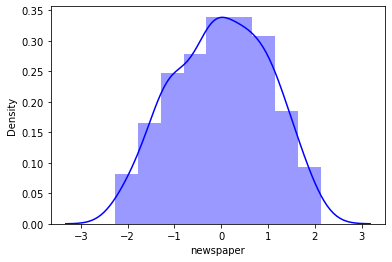

In [55]:
# After removing let's check how the data has been distributed in each column.

sns.distplot(new_df["newspaper"],  color ='b')

In [56]:
# cleaned dataset
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,1.604196,22.1
1,44.5,39.3,0.831044,10.4
2,17.2,45.9,1.607052,9.3
3,151.5,41.3,1.283768,18.5
4,180.8,10.8,1.280622,12.9
...,...,...,...,...
195,38.2,3.7,-0.687435,7.6
196,94.2,4.9,-1.146090,9.7
197,177.0,9.3,-1.314437,12.8
198,283.6,42.0,1.517395,25.5


### Data preprocessing

In [57]:
x = new_df.drop("sales", axis=1)
y = new_df["sales"]

In [58]:
# dataset containing only features
x

,TV,radio,newspaper
0,230.1,37.8,1.604196
1,44.5,39.3,0.831044
2,17.2,45.9,1.607052
3,151.5,41.3,1.283768
4,180.8,10.8,1.280622
...,...,...,...
195,38.2,3.7,-0.687435
196,94.2,4.9,-1.146090
197,177.0,9.3,-1.314437
198,283.6,42.0,1.517395


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,TV,radio,newspaper
0,0.978697,0.989521,1.604196
1,-1.199012,1.090705,0.831044
2,-1.519332,1.535913,1.607052
3,0.056456,1.225616,1.283768
4,0.400243,-0.831784,1.280622
...,...,...,...
193,-1.272932,-1.310720,-0.687435
194,-0.615864,-1.229773,-1.146090
195,0.355657,-0.932968,-1.314437
196,1.606431,1.272836,1.517395


### creating the Model for the predictions

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.9358346827439895 on Random_state  90


maximum r2 score as 93% on the random state 90

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state = maxRS)

Sale prediction is a regression problem

### Importing all the Regression Algorithms

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### Linear Regression

In [64]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))

R2_score: 0.9358346827439895
Mean abs error: 1.0293867863083985
Mean squared error: 1.579629622636131


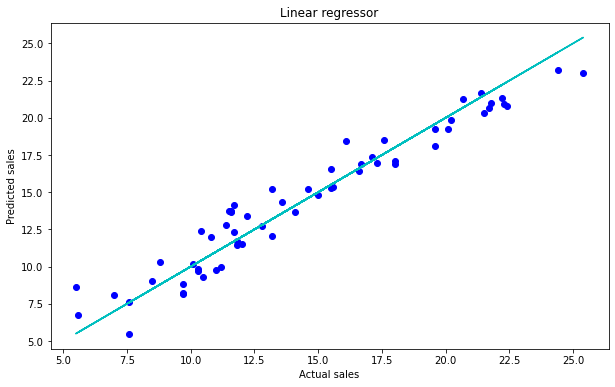

In [65]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predLR,color='b')
plt.plot(y_test,y_test,color='c')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Linear regressor")
plt.show()

very good accuracy with the help of Linear regression model which is 93%

### Random Forest Regressor

In [66]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=90)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

R2_Score: 0.9736204897912449
Mean abs error: 0.6600444444444512
Mean squared error: 0.6494140064814905


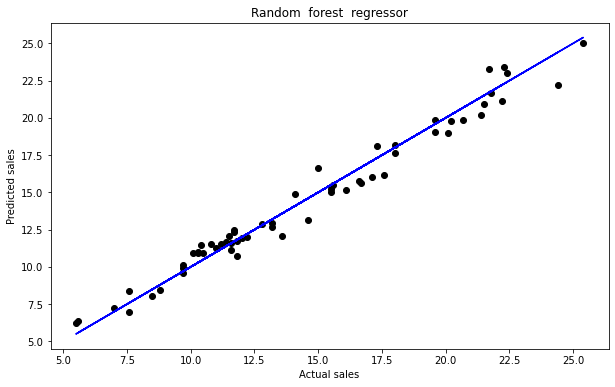

In [67]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR,color='black')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Random  forest  regressor")
plt.show()

R2 score using Random Forest Regressor is 97%.

### KNN Regressor

In [68]:
# Checking R2 score for KNN regressor
knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))

R2_Score: 0.925394255631917
Mean abs error: 0.9446666666666669
Mean squared error: 1.836653333333334


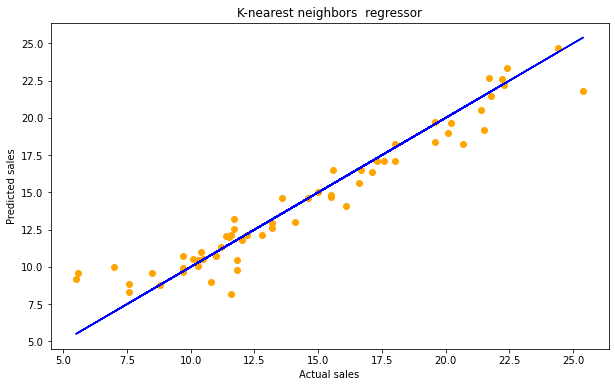

In [69]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("K-nearest neighbors  regressor")
plt.show()

R2 score using KNN Regressor is 92%.

### Stochastic Gradient Descent Regressor

In [70]:
# Checking R2 score for SGD Regressor
SGD=SGDRegressor(epsilon=1, max_iter=500, alpha=0.001,fit_intercept=True)
SGD.fit(x_train,y_train)

#prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('Mean abs error:',mean_absolute_error(y_test, predSGD))
print('Mean squared error:',mean_squared_error(y_test, predSGD))

R2_Score: 0.9349873376562551
Mean abs error: 1.0406429515830902
Mean squared error: 1.6004896675703764


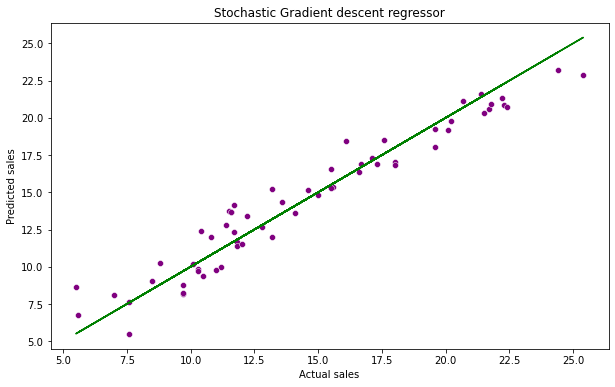

In [71]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=predSGD,color='purple')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Stochastic Gradient descent regressor")
plt.show()

### Checking the cross validation score

For removing the Over fitting we have to use cross validation.

In [72]:
from sklearn.model_selection import cross_val_score

# Checking cv score for Linear Regression
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=7).mean())

The CV score  for Linear_regression is : 0.8840746377370332


In [73]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=7).mean())

The CV  score for  the Random forest regressor is: 0.9772000164869434


In [74]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=7).mean())

The CV score  for  the KNN regressor is : 0.9353670698706963


In [75]:
print('The  CV score for the SGD  regressor is :',cross_val_score(SGD,x,y,cv=7).mean())

The  CV score for the SGD  regressor is : 0.8843975896218425


In [76]:
score= pd.DataFrame({'CV_RFR':0.9772000164869434, 'R2_score_RFR':0.9736204897912449}, index=['0'])

In [77]:
score

,CV_RFR,R2_score_RFR
0,0.9772,0.97362


### Hyperparameter tuning

In [78]:
from sklearn.model_selection import GridSearchCV

#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,400],
             'max_depth':[2,4,6]}

In [79]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=6)
GCV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 400]})

In [80]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 400}

In [81]:
Add_sales = RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=300)
Add_sales.fit(x_train, y_train)
pred_GCV = Add_sales.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_GCV)*100)

R2_Score: 96.91770885848469


### Model Graph

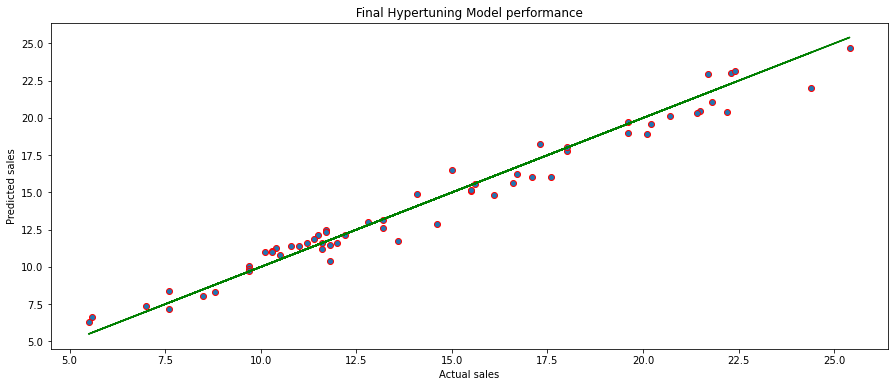

In [82]:
#Verifying the performance of the model by graph
plt.figure(figsize=(15,6))
plt.scatter(x=y_test,y=pred_GCV, edgecolors='red', linewidth=1, cmap='Set3')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title(" Final Hypertuning Model performance ")
plt.show()

### Saving the model

In [83]:
import joblib

joblib.dump(Add_sales,'Add_Sales_Channel.obj')

['Add_Sales_Channel.obj']

In [84]:
loadmodel = joblib.load('Add_Sales_Channel.obj')

### Conclusion & prediction by the final model

In [85]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,18.0,17.773500
1,5.6,6.660167
2,22.3,23.047667
3,19.6,19.759000
4,16.6,15.623833
5,22.2,20.430167
6,21.5,20.479167
7,13.2,12.627333
8,22.4,23.151000
9,8.8,8.309167


<Figure size 864x360 with 0 Axes>

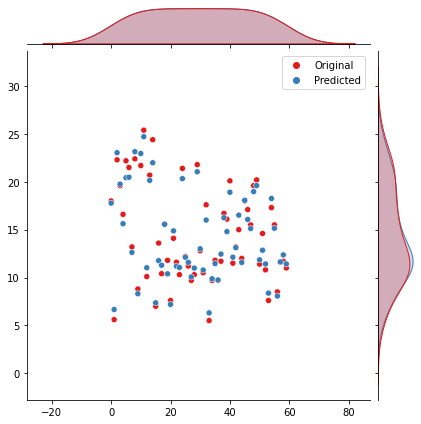

In [86]:
plt.figure(figsize=(12,5))
sns.jointplot(data =df_com, kind='scatter',ratio=8, palette ='Set1')

In [87]:
model = df_com.to_csv('sales_predictor.csv')
model